<a href="https://colab.research.google.com/github/Taejin1221/Lab_Experiment/blob/main/Trajectory_Clustering/Trajectory_Clustering_26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load modules and Set constants

In [1]:
import os, cv2, glob
import numpy as np

import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
WIDTH, HEIGHT = 8, 8
CONCAT_WIDTH, CONCAT_HEIGHT = WIDTH + WIDTH, HEIGHT

EXPERIMENT_DATA = {
    'name' : 'Trajectory_Clusetring',
    'number' : '26',
    'date' : '07-05-2021',
    'description' : 'Clustering with DNN\n'
    }

ROOT_DIR = os.path.join('/content')

DATA_DIR = os.path.join(ROOT_DIR, 'Bitmap')

EXPERIMENT_DIR = os.path.join(ROOT_DIR, 'drive', 'MyDrive', 'University', 'PiLab', 'Experiment')
RESULT_DIR = os.path.join(EXPERIMENT_DIR, 'Results')

os.chdir(RESULT_DIR)
curr_result_name = f"{EXPERIMENT_DATA['name']}_{EXPERIMENT_DATA['number']}_{EXPERIMENT_DATA['date']}_Data"
if (curr_result_name not in os.listdir()):
    os.mkdir(curr_result_name)

CURR_RESULT_DIR = os.path.join(RESULT_DIR, curr_result_name)
os.chdir(CURR_RESULT_DIR)

with open('Description.txt', 'w') as f:
    f.write(EXPERIMENT_DATA['description'])

print(f'ROOT_DIR:        {ROOT_DIR}')
print(f'DATA_DIR:        {DATA_DIR}')
print(f'EXPERIMENT_DIR:  {EXPERIMENT_DIR}')
print(f'RESULT_DIR:      {RESULT_DIR}')
print(f'CURR_RESULT_DIR: {CURR_RESULT_DIR}')

ROOT_DIR:        /content
DATA_DIR:        /content/Bitmap
EXPERIMENT_DIR:  /content/drive/MyDrive/University/PiLab/Experiment
RESULT_DIR:      /content/drive/MyDrive/University/PiLab/Experiment/Results
CURR_RESULT_DIR: /content/drive/MyDrive/University/PiLab/Experiment/Results/Trajectory_Clusetring_26_07-05-2021_Data


# Load Bitmaps

In [5]:
import zipfile

os.chdir(ROOT_DIR)
zipfile.ZipFile("Bitmap.zip").extractall()

In [6]:
os.chdir(DATA_DIR)
print(sorted(glob.glob('*png'))[:10])

['0th data.png', '1000000th data.png', '1000064th data.png', '1000128th data.png', '1000192th data.png', '1000256th data.png', '1000320th data.png', '100032th data.png', '1000384th data.png', '1000448th data.png']


<Figure size 432x288 with 0 Axes>

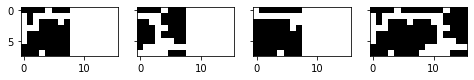

In [7]:
os.chdir(DATA_DIR)

file_names = list(sorted(glob.glob('*png')))

bitmap_data = [ ]
for file in file_names:
    bitmap_data.append(cv2.imread(file, cv2.IMREAD_GRAYSCALE))

plt.gray()
fig, ax = plt.subplots(1, 4, sharex = True, sharey = True, figsize = (8, 64))
ax[0].imshow(bitmap_data[0])
ax[1].imshow(bitmap_data[1])
ax[2].imshow(bitmap_data[2])
ax[3].imshow(cv2.hconcat([bitmap_data[0], bitmap_data[1]]))

plt.show()

In [11]:
len(bitmap_data)

18670

# Create Dataset

In [12]:
X_TRAIN_SIZE = 100
X_TEST_SIZE = 10

X_train, Y_train = [ ], [ ]
for i in range(X_TRAIN_SIZE):
    for j in range(X_TRAIN_SIZE):
        X_train.append(cv2.hconcat([bitmap_data[i], bitmap_data[j]]))
        if (i == j):
            Y_train.append(1)
        else:
            Y_train.append(0)

for i in range(X_TRAIN_SIZE + X_TEST_SIZE, X_TRAIN_SIZE + X_TEST_SIZE + 10_000):
    X_train.append(cv2.hconcat([bitmap_data[i], bitmap_data[i]]))
    Y_train.append(1)

X_test, Y_test = [ ], [ ]
for i in range(X_TRAIN_SIZE, X_TRAIN_SIZE + X_TEST_SIZE):
    for j in range(X_TRAIN_SIZE, X_TRAIN_SIZE + X_TEST_SIZE):
        X_test.append(cv2.hconcat([bitmap_data[i], bitmap_data[j]]))
        if (i == j):
            Y_test.append(1)
        else:
            Y_test.append(0)

for i in range(X_TRAIN_SIZE + X_TEST_SIZE + 10_000, X_TRAIN_SIZE + X_TEST_SIZE + 10_000 + 100):
    X_test.append(cv2.hconcat([bitmap_data[i], bitmap_data[i]]))
    Y_test.append(1)

In [13]:
X_train = np.array(X_train).astype('float32') / 255.
X_train = np.reshape(X_train, (-1, CONCAT_HEIGHT * CONCAT_WIDTH))

X_test = np.array(X_test).astype('float32') / 255
X_test = np.reshape(X_test, (-1, CONCAT_HEIGHT * CONCAT_WIDTH))

Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

In [14]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(20000, 128) (20000,)
(200, 128) (200,)


# Construct Network

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [16]:
NEURON_NUMBER = 128

In [17]:
model = keras.Sequential()
model.add(layers.Dense(NEURON_NUMBER, 'relu', input_shape = (128, )))
model.add(layers.Dropout(0.3))

model.add(layers.Dense(NEURON_NUMBER, 'relu'))
model.add(layers.Dropout(0.3))

model.add(layers.Dense(NEURON_NUMBER, 'relu'))
model.add(layers.Dropout(0.3))

model.add(layers.Dense(NEURON_NUMBER, 'relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(1, activation = 'sigmoid'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1

In [19]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics=['acc'])

In [20]:
history = model.fit(X_train, Y_train, epochs = 50, batch_size = 128)

Epoch 1/50
157/157 [==============================] - 2s 5ms/step - loss: 0.3729 - acc: 0.8105
Epoch 2/50
157/157 [==============================] - 1s 4ms/step - loss: 0.0624 - acc: 0.9765
Epoch 3/50
157/157 [==============================] - 1s 4ms/step - loss: 0.0259 - acc: 0.9913
Epoch 4/50
157/157 [==============================] - 1s 4ms/step - loss: 0.0156 - acc: 0.9950
Epoch 5/50
157/157 [==============================] - 1s 4ms/step - loss: 0.0111 - acc: 0.9965
Epoch 6/50
157/157 [==============================] - 1s 4ms/step - loss: 0.0071 - acc: 0.9978
Epoch 7/50
157/157 [==============================] - 1s 4ms/step - loss: 0.0092 - acc: 0.9974
Epoch 8/50
157/157 [==============================] - 1s 4ms/step - loss: 0.0062 - acc: 0.9984
Epoch 9/50
157/157 [==============================] - 1s 4ms/step - loss: 0.0093 - acc: 0.9978
Epoch 10/50
157/157 [==============================] - 1s 4ms/step - loss: 0.0066 - acc: 0.9984
Epoch 11/50
157/157 [============================

In [21]:
score = model.evaluate(X_test, Y_test)
print(score)

7/7 [==============================] - 0s 2ms/step - loss: 0.0010 - acc: 1.0000
[0.0010142824612557888, 1.0]


tf.Tensor([[1.]], shape=(1, 1), dtype=float32)


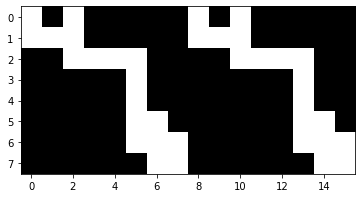

In [24]:
print(model(X_test[0:1]))
plt.imshow(np.reshape(X_test[0:1], (8, 16)))
plt.show()

tf.Tensor([[0.]], shape=(1, 1), dtype=float32)


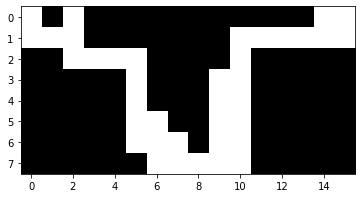

In [25]:
print(model(X_test[1:2]))
plt.imshow(np.reshape(X_test[1:2], (8, 16)))
plt.show()

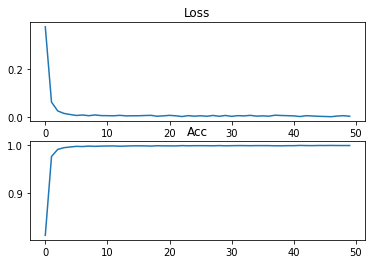

In [27]:
os.chdir(CURR_RESULT_DIR)

model.save('model.h5')

fig, ax = plt.subplots(2, 1)
ax[0].plot(history.history['loss'])
ax[0].set_title('Loss')

ax[1].plot(history.history['acc'])
ax[1].set_title('Acc')

plt.savefig('result' + '.png')
plt.show()